## 1. Project Description
A home loan dataset was given to make a Home Loan Approval prediction. Currently, In approval process customers first apply for the home loan and after that company validates the customer's eligibiity based on different parameters asked in Home Loan approval form. These parameters are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. Now, the company wants to automate the loan eligibility process in real-time based on the customer detail provided while fillling online application form.
It is a Binary Classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict the discrete values based on a given set of independent variable(s).In this  project we will identify the best algorithm by comparing the results of different classiffication algorithms for Home Loan approval prediction where based on the parameters applicant will get there loan approved/disapproved and accordingly company will focus only on the approved customers.
 
## 2. The Problem Statement:
A company wants to know and automate the process that which customers or applicant should be given the loans for buying the Home. 

## 3.The Hypothesis Generation: 
Below are some points which I think may affect the application,

1. Lower the loan amount will increase the chances of getting loan approved.
2. People who has business has less chances to get their home loan approved.
3. Those applicant who has higher income will have higher chances of getting their loan approved.
4. Females applicants have better chance of getting loan approved.
5. Married applicant will have the lower chances of getting loan approved.
6. Applicants who are buying property in urban areas will easily get loan approved.
7. Co-applicant with higher income will increase the chances of getting loan approved for main applicant.
8. Loan for less time period should have higher chances of approval.
9. Applicants who have repayed their previous debts should have higher chances of loan approval.

## 4. Possible Outcome
1. Generally males got their loan approved easily.
2. Applicant who are buying property in Semi-Urban area will easily get their loan approved.

## 5. Getting the system ready, Importing Necessary Python Packages and loading the Datasets      (Training & Test).

In [474]:
# To ignore any warnings
import warnings
warnings.filterwarnings('ignore')
#To run all the commands in a same shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Setting diectory
import os
os.chdir(r'/Users/harsh/Dropbox/Data science-HARSH/Projects/Python Project Home')
import numpy as np
import pandas as pd
# For plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
# For data visualization
import seaborn as sns
#for different algorithms
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

We have given two files (Train & Test).Train file will be used for training the model, i.e. our model will learn from this file.Train file contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

In [21]:
#Loading Train data
loan_train=pd.read_csv('Train_Loan_Home.csv')
loan_train.head().T
#Loading Test data
loan_test=pd.read_csv('Test_Loan_Home.csv')
loan_test.head().T

#Make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.
train_original=loan_train.copy()
test_original=loan_test.copy()



,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0,1508,0,2358,0
LoanAmount,NaN,128,66,120,141
Loan_Amount_Term,360,360,360,360,360


,0,1,2,3,4
Loan_ID,LP001015,LP001022,LP001031,LP001035,LP001051
Gender,Male,Male,Male,Male,Male
Married,Yes,Yes,Yes,Yes,No
Dependents,0,1,2,2,0
Education,Graduate,Graduate,Graduate,Graduate,Not Graduate
Self_Employed,No,No,No,No,No
ApplicantIncome,5720,3076,5000,2340,3276
CoapplicantIncome,0,1500,1800,2546,0
LoanAmount,110,126,208,100,78
Loan_Amount_Term,360,360,360,360,360


# 6. Understanding the data

In [18]:
#checking features in the train data set
loan_train.columns
#checking features in the test data set
loan_test.columns
# We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset, test data sets also
# have the same independent variable but do not have target variable.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### Description of the each variable
        Variable	    Description
    1. Loan_ID         Unique Loan ID
    2. Gender	       Male/ Female
    3. Married	       Applicant married (Y/N)
    4.Dependents	   Number of dependents
    5.Education	       Applicant Education (Graduate/Under Graduate)
    6.Self_Employed	   Self employed (Y/N)
    7.ApplicantIncome	Applicant income
    8.CoapplicantIncome	Coapplicant income
    9. LoanAmount	    Loan amount in thousands
    10.Loan_Amount_Term	Term of loan in months
    11.Credit_History	Credit history is good or bad (1=Good, 0=Bad)
    12.Property_Area	Urban/ Semi Urban/ Rural
    13.Loan_Status	    Loan approved (Y/N)

In [23]:
# check information and data types for each variable
loan_train.info()
# check shape of each datasets
loan_train.shape
loan_test.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


(614, 13)

(367, 12)

#### Above Information shows that some features have missing non-null values (which we have to treat before fitting model)

In [85]:
#lets see how many missing values each variable has in train and test data.
#Total missing values in both datasets
loan_train.isnull().values.sum()
loan_test.isnull().values.sum()
#Total missing values variable wise
loan_train.isnull().sum()
loan_test.isnull().sum()

149

84

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
# check description of all features(numerical and non-numerical)
loan_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001691,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [137]:
# Categorical variable categories and their percentage distribution.
list=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
for i in list:
    loan_train[i].value_counts(normalize='True')

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64

Yes    0.653094
No     0.346906
Name: Married, dtype: float64

0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64

## 7. Handling Missing Values

In [ ]:
# As we can see from above (section-6) that some categorical variables have some missing value, lets replace them with most frequent values'Mode'
loan_train.Gender.fillna(loan_train.Gender.mode()[0], inplace=True)
loan_train.Married.fillna(loan_train.Married.mode()[0], inplace=True)
loan_train.Dependents.fillna(loan_train.Dependents.mode()[0], inplace=True)
loan_train.Self_Employed.fillna(loan_train.Self_Employed.mode()[0], inplace=True)
loan_train.Credit_History.fillna(loan_train.Credit_History.mode()[0], inplace=True)

In [73]:
# Imputing missing values for numerical varibales (Loan amount term and Loan amount)
#Loan amount term (Its categorical but in numeric, so we can replace with mode of 360)
loan_train.Loan_Amount_Term.value_counts()
loan_train.Loan_Amount_Term.fillna(loan_train.Loan_Amount_Term.mode()[0],inplace=True)

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Text(0,0.5,'Total Loan Amount')

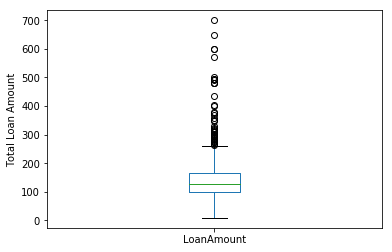

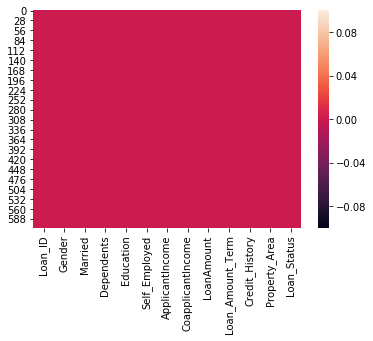

In [63]:
#Loan amount,is numerical so we can fill the missing value with mean, but first check wether it has any outlier or not.
loan_train.LoanAmount.plot(kind='box')
plt.ylabel('Total Loan Amount')
plt.show()
#It has some outliers so better we should not use mean for missing values but we can use median for imputaion of null values.
loan_train.LoanAmount.fillna(loan_train.LoanAmount.median(),inplace=True)

# Lets check the data again with any missing values
sns.heatmap(loan_train.isnull())


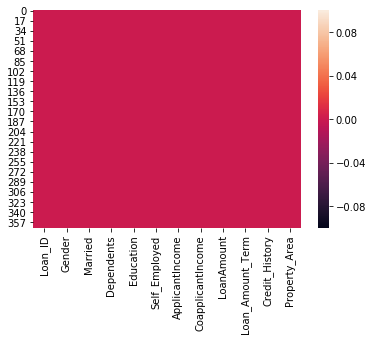

In [113]:
# lets fill the missing value in the test dataset as well with the same steps and methods
loan_test.Gender.fillna(loan_test.Gender.mode()[0], inplace=True)
loan_test.Married.fillna(loan_test.Married.mode()[0], inplace=True)
loan_test.Dependents.fillna(loan_test.Dependents.mode()[0], inplace=True)
loan_test.Self_Employed.fillna(loan_test.Self_Employed.mode()[0], inplace=True)
loan_test.Credit_History.fillna(loan_test.Credit_History.mode()[0], inplace=True)
loan_test.Loan_Amount_Term.fillna(loan_test.Loan_Amount_Term.mode()[0],inplace=True)
loan_test.LoanAmount.fillna(loan_test.LoanAmount.median(),inplace=True)
# Lets check the data again with any missing values
sns.heatmap(loan_test.isnull())

## 8. Exploratory Data Analysis
### A. Univariate Analysis
### B. Bivariate Analysis

### A. Univariate Analysis

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

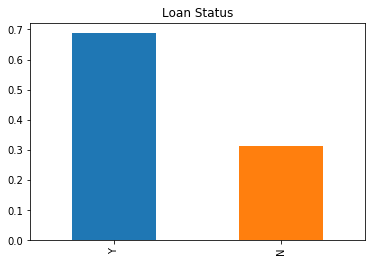

In [175]:
# Lets first analyze the Target variable i.e Loan Status
loan_train.Loan_Status.value_counts(normalize=True)
loan_train.Loan_Status.value_counts(normalize=True).plot.bar(title= 'Loan Status')

68.72% of the applicants have loan approved i.e most of the applicants are getting there loan approved

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64

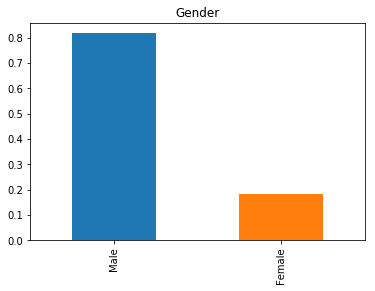

In [567]:
#lets explore others features
#Gender ratio of the applicants
loan_train.Gender.value_counts(normalize=True)
loan_train.Gender.value_counts(normalize=True).plot.bar(title= 'Gender')

81.75% of applicant are male and 18.24% of applicants are female

Yes    0.653094
No     0.346906
Name: Married, dtype: float64

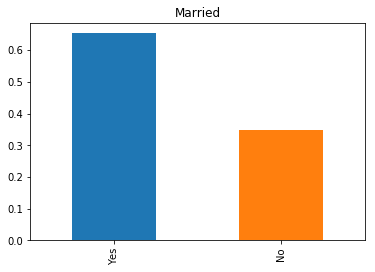

In [180]:
#Marital Status of applicant
loan_train.Married.value_counts(normalize=True)
loan_train.Married.value_counts(normalize=True).plot.bar(title= 'Marital Status')

Among all the applicants 65.30% of the applicants are married and 34% are unmarried

0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64

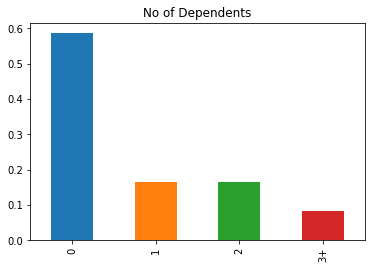

In [181]:
#No of dependents of applicant
loan_train.Dependents.value_counts(normalize=True)
loan_train.Dependents.value_counts(normalize=True).plot.bar(title= 'No of Dependents')

among all the aplicants around 58.63% of the applicants have no dependents and the applicants with highest 3+ dependents is very less i.e.8%

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

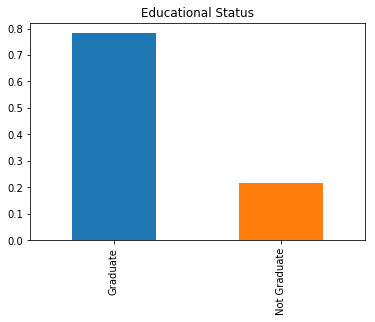

In [182]:
#Educational Status of applicant
loan_train.Education.value_counts(normalize=True)
loan_train.Education.value_counts(normalize=True).plot.bar(title= 'Educational Status')

Among all the applicants 78% are graduate and rest are non-graduate

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64

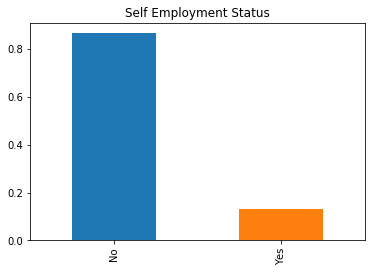

In [183]:
#Self employment Status of applicant
loan_train.Self_Employed.value_counts(normalize=True)
loan_train.Self_Employed.value_counts(normalize=True).plot.bar(title= 'Self Employment Status')

Among all the applicants 86.64% are salaried people or those who are not self employed

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64

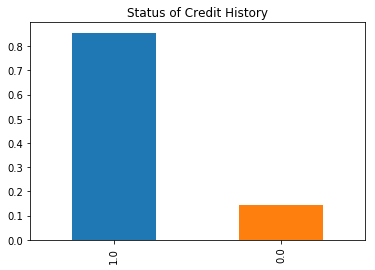

In [184]:
#Credit History Status of applicant
loan_train.Credit_History.value_counts(normalize=True)
loan_train.Credit_History.value_counts(normalize=True).plot.bar(title= 'Status of Credit History')

Among all the applicants 85% have good credit history

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

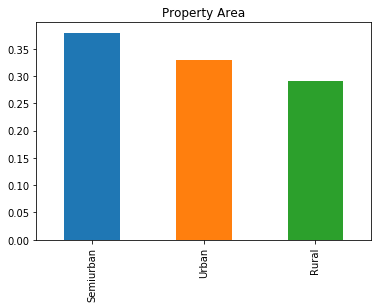

In [300]:
#Location of Property area of applicant
loan_train.Property_Area.value_counts(normalize=True)
loan_train.Property_Area.value_counts(normalize=True).plot.bar(title= 'Property Area')

37.94% of the applicants are taking Home Loan for the properties located in SemiUrban are followed by Urban and Rural area

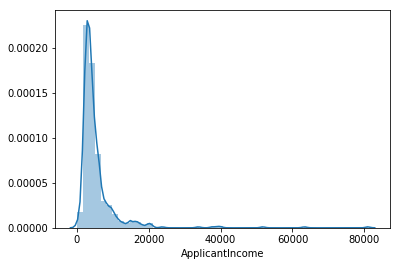

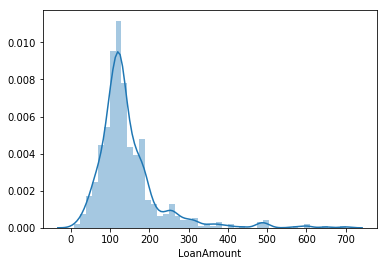

In [241]:
# Applicant income and  Loan Amount distribution
sns.distplot(loan_train.ApplicantIncome)
plt.show()
sns.distplot(loan_train.LoanAmount)

Its quite visible from above applicant income graph that it is positively skewed and not normally distributed while Loan amount graph is slightly right skewed but in general it is normally distributed. Mean Applicant income is 5403.

### B. Bivariate Analysis

#### We have generated some hypothesis earlier lets test some of them using bivariate analysis with respect to target variable

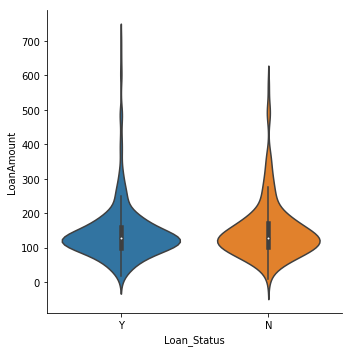

In [231]:
#Hypotheis:- Lower the loan amount will increase the chances of getting loan approved.
sns.catplot(x="Loan_Status", y="LoanAmount", kind="violin",data=loan_train)


Conclusion:- As shown in above graph that at less loan amount the chances of getting loan approved is higher than at high loan amount

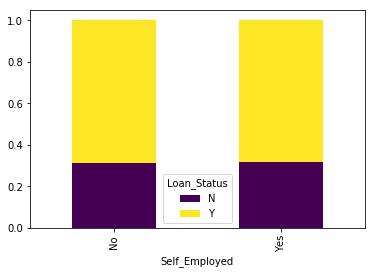

In [282]:
#Hypotheis:- People who has business has less chances to get their home loan approved.
pd.crosstab(loan_train['Self_Employed'],loan_train['Loan_Status'],normalize='index').plot(kind="bar",colormap='viridis',stacked=True)

Conclusion:- As per above graph it is clearly visible that loan approval status is same for the self employed and not self employed

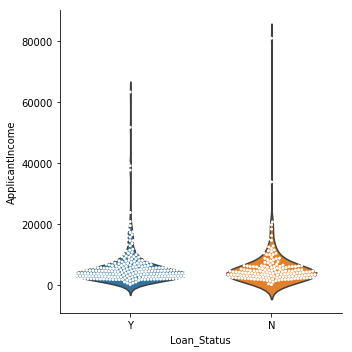

In [279]:
#Hypotheis:- Those applicant who has higher income will have higher chances of getting their loan approved.
ai = sns.catplot(x="Loan_Status", y="ApplicantIncome", kind="violin", inner=None, data=loan_train)
sns.swarmplot(x="Loan_Status", y="ApplicantIncome", color="w", size=3, data=loan_train, ax=ai.ax);

Conclusion:- As per above graph we can say that at higher income level number of loan approvals are high

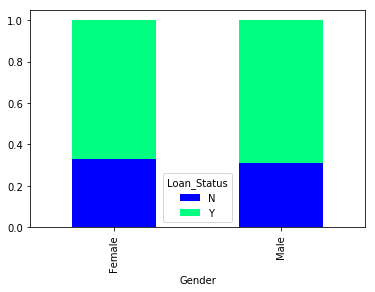

In [286]:
#Hypotheis:- Females applicants have better chance of getting loan approved.
pd.crosstab(loan_train.Gender,loan_train.Loan_Status,normalize='index').plot(kind="bar",colormap='winter',stacked=True)

Conclusion:- As per above graph it is clearly visible that loan approval ratio is mor or less same for both the gender

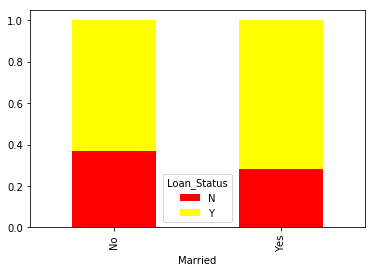

In [288]:
#Hypotheis:- Married applicant will have the lower chances of getting loan approved.
pd.crosstab(loan_train.Married,loan_train.Loan_Status,normalize='index').plot(kind="bar",colormap='autumn',stacked=True)

Conclusion:- As per above graph our hypothesis regarding marital status was wrong in fact married people has higher chance of getting loan approved

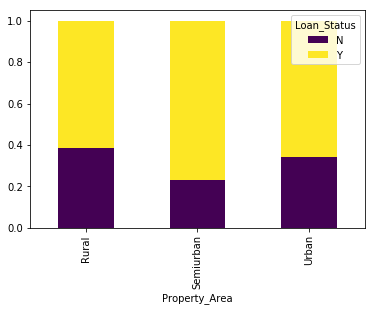

In [291]:
#Hypotheis:- Applicants who are buying property in urban areas will easily get loan approved.
pd.crosstab(loan_train.Property_Area,loan_train.Loan_Status,normalize='index').plot(kind="bar",colormap='viridis',stacked=True)


Conclusion:- Applicants who are buying property in Semi-Urban area having more loan approved 

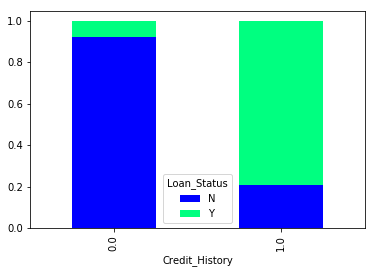

In [293]:
#Hypotheis:- Applicants who have repayed their previous debts or good creidt history should have higher chances of loan approval.
pd.crosstab(loan_train.Credit_History,loan_train.Loan_Status,normalize='index').plot(kind="bar",colormap='winter',stacked=True)


Conclusion:- Applicants who have good credit history they have higher proportion of loan approval as compare to the bad credit history applicant.

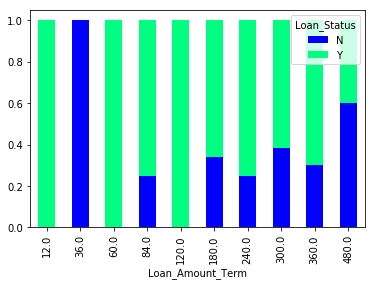

In [298]:
#Loan for less time period should have higher chances of approval.
pd.crosstab(loan_train.Loan_Amount_Term,loan_train.Loan_Status,normalize='index').plot(kind="bar",colormap='winter',stacked=True)



Conclusion:- Though its not clear from above graph but holistically we can say that Lower Loan Term period have higher chances of getting loan approved

In [347]:
# Now lets see how features are corelated with each other
# for this lets first copy the datasets in to other datasets
loan_trainc=loan_train.copy()
# Now convert all object type into integers or in numerical form for correlation matrix plotting.
loan_trainc.Gender.replace({'Male':0,'Female':1},inplace=True)
loan_trainc.Married.replace({'Yes':1,'No':0},inplace=True)
loan_trainc.Dependents.replace('3+','3',inplace=True)
loan_train.Dependents.replace('3+','3',inplace=True)
loan_test.Dependents.replace('3+','3',inplace=True)
loan_trainc.Dependents=loan_trainc.Dependents.astype('int64') # changing object type to integer type
loan_train.Dependents=loan_trainc.Dependents.astype('int64')
loan_test.Dependents=loan_trainc.Dependents.astype('int64')
loan_trainc.Education.replace({'Graduate':1,'Not Graduate':0},inplace=True)
loan_trainc.Self_Employed.replace({'Yes':1,'No':0},inplace=True)
loan_trainc.Property_Area.replace({'Semiurban':1,'Urban':2,'Rural':3},inplace=True)
loan_trainc.Loan_Status.replace({'Y':1,'N':0},inplace=True)

<Figure size 648x504 with 0 Axes>

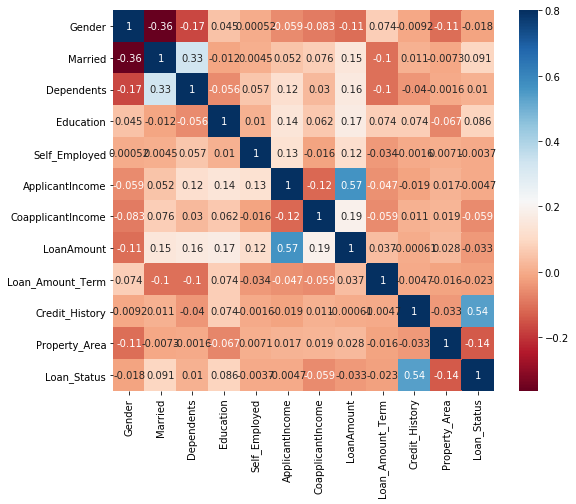

In [339]:
# Heat Map Plotting Correlation matrix to see correlation between different features.
covmatrix = loan_trainc.corr()
plt.figure(figsize=(9,7))
sns.heatmap(covmatrix, xticklabels=covmatrix.columns.values,yticklabels=covmatrix.columns.values,vmax=.8, square=True, cmap="RdBu",annot=True)



In above graph The variables with blue color means their correlation is more.Graph shows that Loan status & credit history is correlated and Loan amount & Applicant income is correlated. Marital status and number of Dependents are also related which is quite obvious

## 9. Model Building

We will build the following models in this section.

1. Logistic Regression
2. SVM
3. KNN
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. AdaBoost

In [419]:
#Make copy of the both train and test data set
loan_traingd=loan_train.copy()
loan_testgd=loan_test.copy()
#First lets remove the unnecessary column like Loan ID
loan_traingd=loan_traingd.drop('Loan_ID',axis=1)
loan_testgd=loan_testgd.drop('Loan_ID',axis=1)

In [550]:
#Splitting dependent (target) and independent variable from train dataset
X=loan_traingd.drop('Loan_Status',axis=1)
y=loan_traingd.Loan_Status

#Converting categorical variables in numerical variables for modelling in train datasets
X=pd.get_dummies(X)

#Converting categorical variables in numerical variables for modelling in test datasets
test=pd.get_dummies(loan_testgd)

#Scale the features: X_scaled
X_scaled = scale(X)

In [551]:
#make variable for save the result and to show it
classifier = ('Logistic Regression','SVM','K-Nearest Neighbor','Decision Tree','Random Forest','Gradient Boosting','AdaBoost')
y_pos = np.arange(len(classifier))
score = []

In [552]:
clf = LogisticRegression()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The accuracy of model is 80.80%


In [553]:
clf = SVC()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The accuracy of model is 80.47%


In [554]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_scaled, y,cv=5)
clf.fit(X_scaled, y)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The accuracy of model is 75.41%


In [555]:
clf = DecisionTreeClassifier()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The accuracy of model is 70.05%


In [556]:
clf = RandomForestClassifier()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy of model is 75.41%


In [557]:
clf = GradientBoostingClassifier()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

The accuracy of model is 77.71%


In [558]:
clf = AdaBoostClassifier()
clf.fit(X_scaled, y)
scores = cross_val_score(clf, X_scaled, y,cv=5)
score.append(scores.mean())
print('The accuracy of model is %.2f%%' %(scores.mean()*100))
pred_test = clf.predict(test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

The accuracy of model is 78.51%


<BarContainer object of 7 artists>

([<matplotlib.axis.YTick at 0x1a25b50cf8>,
 <a list of 7 Text yticklabel objects>)

Text(0.5,0,'Score')

Text(0.5,1,'Classification Model Performance')

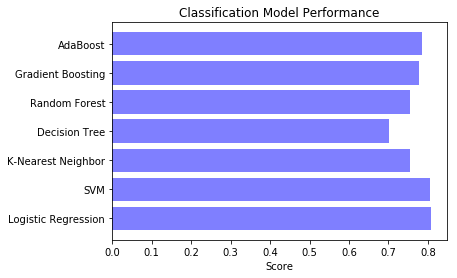

In [564]:
plt.barh(y_pos, score, align='center', alpha=0.5,color='b')
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Model Performance')
plt.show()

After trying and testing 7 different algorithms, the best accuracy is achieved by Logistic Regression (80.80), followed by SVM (80.47) and ADA Boost (78.51).

## What more can be tried?

There are still quite a many things that can be tried to improve our models’ predictions. We create and add more features, try different models with different subset of features and/or rows, etc. 
Some of the points are listed below:

1. We can train the Adaboost and Random Forest model using grid search to optimize its hyperparameters and improve the accuracy.

2. We can also make independent vs independent variable visualizations to discover some more patterns.